In [4]:
import random
import matplotlib.pyplot as plt

# Problem 1
## Part a)

In [21]:
def biased_cf_experiment(p, n):
    cfs = []

    for i in range(n): 
        r = random.random()
        if r < p:
            cfs.append(1)
        else:
            cfs.append(0)

    num_heads = sum(cfs)

    h_count = 0
    running_counts = []
    max_h_count = 0
    for i in cfs:
        if i:
            h_count += 1
        else:
            running_counts.append(h_count)
            if h_count > max_h_count:
                max_h_count = h_count
            h_count = 0
    return num_heads, max_h_count, running_counts

p_head = 0.7
n = 50
num_heads, max_h_count = biased_cf_experiment(p_head, n)[:2]
print("The total number of heads in " + str(n) + " trials is: " + str(num_heads) + ".\nThe longest run of heads is: " + str(max_h_count) + ".")

The total number of heads in 50 trials is: 34.
The longest run of heads is: 7.


### We should expect around 35 heads given that the probability of heads is 0.7 and the number of flips is 50. So, the expectation would be np = 50(0.7)=35.

## Part b)

(array([  7.,  20.,  59., 136., 224., 249., 187.,  92.,  22.,   4.]),
 array([25., 27., 29., 31., 33., 35., 37., 39., 41., 43., 45.]),
 <BarContainer object of 10 artists>)

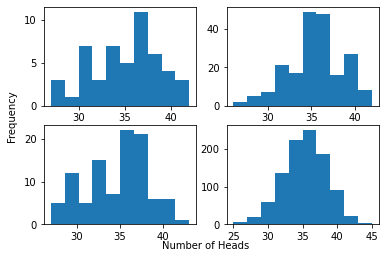

In [22]:
p_head = 0.7
n = 50

n1 = 50
num_heads50 = []

for i in range(n1):
    num_heads50.append(biased_cf_experiment(p_head, n)[0])

n2 = 100
num_heads100 = []

for i in range(n2):
    num_heads100.append(biased_cf_experiment(p_head, n)[0])

n3 = 200
num_heads200 = []

for i in range(n3):
    num_heads200.append(biased_cf_experiment(p_head, n)[0])

n4 = 1000
num_heads1000 = []

for i in range(n4):
    num_heads1000.append(biased_cf_experiment(p_head, n)[0])

fig, axs = plt.subplots(2, 2)
fig.text(0.5, 0.04, 'Number of Heads', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
axs[0, 0].hist(num_heads50)
axs[1, 0].hist(num_heads100)
axs[0, 1].hist(num_heads200)
axs[1, 1].hist(num_heads1000)

### It seems that as the number of iterations to repeat the experiment increases, we notice that the distribution of the number of heads starts to resemble a normal distribution with mean np = 50(0.7) = 35 and variance of np(1-p) = 50(0.7)(0.3) = 10.5.

## Part c)

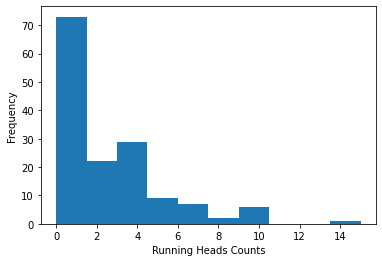

In [23]:
p_head = 0.7
n = 500

running_counts = biased_cf_experiment(p_head, n)[2]

plt.hist(running_counts)
plt.xlabel('Running Heads Counts')
plt.ylabel('Frequency')
plt.show()

### It makes sense to see that the a running heads count of 0 would occur the most often because tails will appear approximately 30% of the time and so whenever a tails appears, theres a 30% chance of another one appearing which would result in the 0 running heads. As the number of running heads increases, we would expect a downward trend in the frequency of this number of running heads which is seen in the histogram above.

# Problem 2

As the number of realizations increases, we see that the average value is: 8.6846


(array([ 784., 1751., 2441., 2190., 1419., 1182.,  160.,   45.,   19.,
           9.]),
 array([ 5. ,  6.2,  7.4,  8.6,  9.8, 11. , 12.2, 13.4, 14.6, 15.8, 17. ]),
 <BarContainer object of 10 artists>)

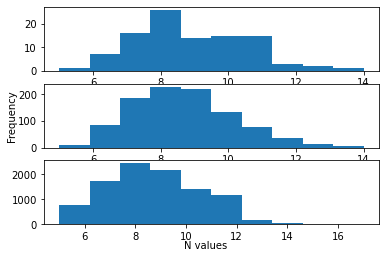

In [31]:
def generate_N():
    sum = 0
    n = 0

    while sum <= 4:
        x_i = random.uniform(0, 1)
        sum += x_i
        n += 1

    return n

n1 = 100
n_vals100 = []
for i in range(n1):
    n_vals100.append(generate_N())

n2 = 1000
n_vals1000 = []
for i in range(n2):
    n_vals1000.append(generate_N())

n3 = 10000
n_vals10000 = []
for i in range(n3):
    n_vals10000.append(generate_N())


avg_val = sum(n_vals10000)/len(n_vals10000)
print("As the number of realizations increases, we see that the average value is: " + str(avg_val))

fig, ax = plt.subplots(3)
fig.text(0.5, 0.04, 'N values', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
ax[0].hist(n_vals100)
ax[1].hist(n_vals1000)
ax[2].hist(n_vals10000)

### As we can see E(N) seems to approach 8.6666 as the number of realizations of N grows larger. This matches up with what is expected. The distribution described is similar to the uniform sum distribution. Using the wolfram alpha page on uniform sum distribution, we see that for n = 4, the expected minimum number of uniform random variables whos sum exceeds n, we get the following expression: (1/6)(6e^4 -18e^3 +12e^2 -e)=8.6666... So, as we can see, as the number of realizations increases, we see that the average value approaches E(N) as desired.